In [1]:
!pip install astroquery

# 13.10 Scatter и Quiver

In [ ]:
import numpy as np
from astropy.io import ascii
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt

In [ ]:
Gaia.ROW_LIMIT = 50
coord = SkyCoord(ra='22h07m30.00s', dec='+00d43m00.4s', frame='icrs')
q_resutl = Gaia.cone_search_async(coord, radius=u.Quantity(0.5, u.deg),
                                  columns=["ra", "dec", "pmra", "pmdec", "phot_g_mean_mag"]).get_results()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
ascii.write(q_resutl, "GAIA_table.txt", overwrite=True, delimiter="\t",
            format="commented_header", fill_values=[(ascii.masked, "nan")])

In [ ]:
q_resutl = ascii.read("GAIA_table.txt", delimiter="\t", format="commented_header",
                      fill_values=[(ascii.masked, "nan")])

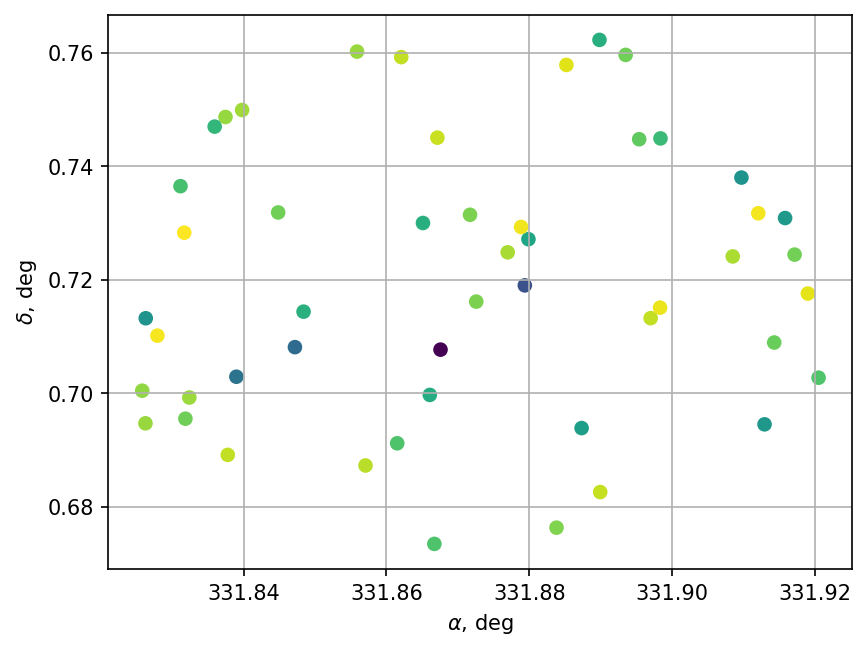

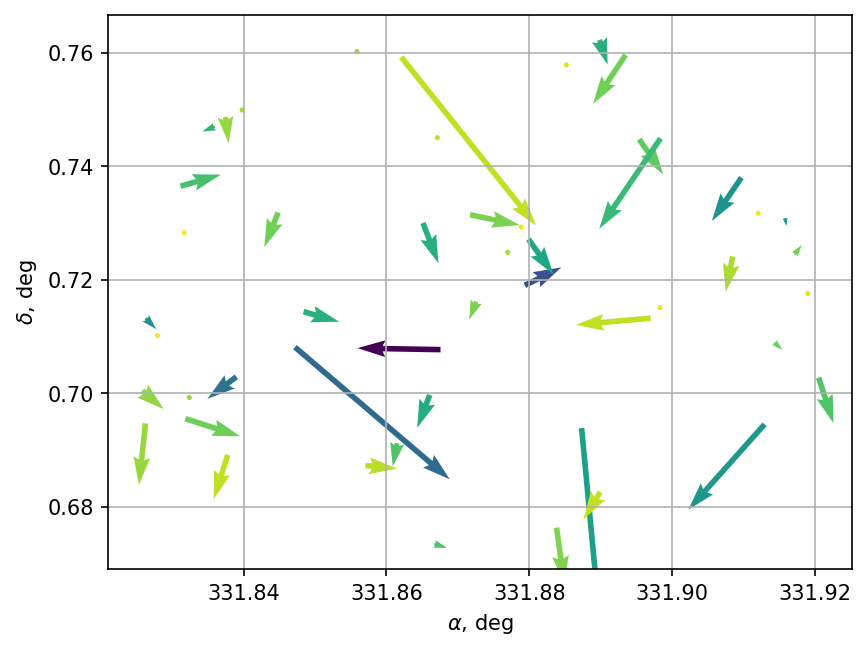

In [ ]:
fig1, ax1 = plt.subplots(dpi=150)
ax1.set_xlabel(r"$\alpha$, deg")
ax1.set_ylabel(r"$\delta$, deg")
ax1.grid()
msize = q_resutl["phot_g_mean_mag"]
ax1.scatter(q_resutl["ra"], q_resutl["dec"], c=q_resutl["phot_g_mean_mag"])
plt.savefig(f"result_scatter.png")


fig2, ax2 = plt.subplots(dpi=150)
ax2.set_xlabel(r"$\alpha$, deg")
ax2.set_ylabel(r"$\delta$, deg")
ax2.grid()
ax2.quiver(q_resutl["ra"].filled(0), q_resutl["dec"].filled(0), q_resutl["pmra"].filled(0), q_resutl["pmdec"].filled(0), q_resutl["phot_g_mean_mag"])
plt.savefig(f"result_quiver.png")

# 20.10 Xmatch

In [ ]:
"""
# Wavelengths are given in microns
# Zero-points are given in Vega-based system
# WISE - When the number of sightings is zero, the fluxes are set to the negative value of the sensitivity limit

Gaia    I/355/gaiadr3
    G   phot_g_mean_mag    [mag]  0.622   3229
    BP  phot_bp_mean_mag   [mag]  0.511   3552
    RP  phot_rp_mean_mag   [mag]  0.777   2555
2MASS   II/246/out
    J   Jmag                [mag]   1.235   1594
    H   Hmag                [mag]   1.662   1024
    K   Kmag                [mag]   2.159   666.8
MSX6C   V/114/msx6_main |   V/114/msx6_gp
    B1  -//-                [Jy]    4.29
    B2  -//-                [Jy]    4.25
    A   -//-                [Jy]    8.28
    C   -//-                [Jy]    12.13
    D   -//-                [Jy]    14.65
    E   -//-                [Jy]    21.34
WISE    II/311/wise
    W1  W1mag               [mag]   3.4     309.54
    W2  W2mag               [mag]   4.6     171.79
    W3  W3mag               [mag]   12      31.676
    W4  W4mag               [mag]   22      8.3635
Pan-STARRS  II/349/ps1
    g   gmag                [mag]   0.4866  3964.03
    r   rmag                [mag]   0.6215  3173.02
    i   imag                [mag]   0.7545  2575.36
    z   zmag                [mag]   0.8679  2261.81
    y   ymag                [mag]   0.9633  2180.40
"""

In [2]:
import numpy as np
from astropy.io import ascii
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroquery.vizier import Vizier
from astroquery.xmatch import XMatch
import matplotlib.pyplot as plt

Could not import regions, which is required for some of the functionalities of this module.


In [3]:
"GAIA"
coord = SkyCoord(ra='22h07m30.00s', dec='+00d43m00.4s', frame='icrs')
qviz = Vizier(columns=["ra2000", "dec2000", "phot_g_mean_mag", "phot_bp_mean_mag", "phot_rp_mean_mag"])
qviz.ROW_LIMIT = 200
qres = qviz.query_region(coord, radius=u.Quantity(0.2, u.deg), catalog="I/355/gaiadr3")[0]
ascii.write(qres, "gaia.txt", overwrite=True, delimiter="\t",
            format="commented_header", fill_values=[(ascii.masked, "nan")])
# qres = ascii.read("gaia.txt", delimiter="\t", format="commented_header",
#                   fill_values=[(ascii.masked, "nan")])


In [4]:
"2MASS"
x2mass = XMatch.query(cat1=qres, cat2="vizier:II/246/out", max_distance=20 * u.arcsec,
                      colRA1="RAJ2000", colDec1="DEJ2000")
ascii.write(x2mass, "2mass.txt", overwrite=True, delimiter="\t",
            format="commented_header", fill_values=[(ascii.masked, "nan")])
# x2mass = ascii.read("2mass.txt", delimiter="\t", format="commented_header",
#                     fill_values=[(ascii.masked, "nan")])
qres["Jmag"] = np.nan
qres["Hmag"] = np.nan
qres["Kmag"] = np.nan
for _ in range(len(x2mass)):
    for __ in range(len(qres)):
        if x2mass["RAJ2000_1"][_] == qres["RAJ2000"][__] and x2mass["DEJ2000_1"][_] == qres["DEJ2000"][__]:
            qres["Jmag"][__] = x2mass["Jmag"][_]
            qres["Hmag"][__] = x2mass["Hmag"][_]
            qres["Kmag"][__] = x2mass["Kmag"][_]
    if _ % 10 == 0:
        print(f"Merging GAIA and 2MASS - {_} rows processed")
# qres = ascii.read("qres.txt", delimiter="\t", format="commented_header",
#                   fill_values=[(ascii.masked, "nan")])

Merging GAIA and 2MASS - 0 rows processed
Merging GAIA and 2MASS - 10 rows processed
Merging GAIA and 2MASS - 20 rows processed
Merging GAIA and 2MASS - 30 rows processed
Merging GAIA and 2MASS - 40 rows processed
Merging GAIA and 2MASS - 50 rows processed
Merging GAIA and 2MASS - 60 rows processed
Merging GAIA and 2MASS - 70 rows processed
Merging GAIA and 2MASS - 80 rows processed
Merging GAIA and 2MASS - 90 rows processed
Merging GAIA and 2MASS - 100 rows processed
Merging GAIA and 2MASS - 110 rows processed
Merging GAIA and 2MASS - 120 rows processed
Merging GAIA and 2MASS - 130 rows processed
Merging GAIA and 2MASS - 140 rows processed
Merging GAIA and 2MASS - 150 rows processed


In [5]:
"MSX6C"
xmsx6c = XMatch.query(cat1=qres, cat2="vizier:V/114/msx6_main", max_distance=20 * u.arcsec,
                      colRA1="RAJ2000", colDec1="DEJ2000")
ascii.write(xmsx6c, "msx6c.txt", overwrite=True, delimiter="\t",
            format="commented_header", fill_values=[(ascii.masked, "nan")])
# xmsx6c = ascii.read("msx6c.txt", delimiter="\t", format="commented_header",
#                     fill_values=[(ascii.masked, "nan")])
qres["B1"] = np.nan
qres["B2"] = np.nan
qres["A"] = np.nan
qres["C"] = np.nan
qres["D"] = np.nan
qres["E"] = np.nan
for _ in range(len(xmsx6c)):
    for __ in range(len(qres)):
        if xmsx6c["RAJ2000_1"][_] == qres["RAJ2000"][__] and xmsx6c["DEJ2000_1"][_] == qres["DEJ2000"][__]:
            qres["B1"][__] = xmsx6c["B1"][_]
            qres["B2"][__] = xmsx6c["B2."][_]
            qres["A"][__] = xmsx6c["A"][_]
            qres["C"][__] = xmsx6c["C"][_]
            qres["D"][__] = xmsx6c["D"][_]
            qres["E"][__] = xmsx6c["E"][_]
    if _ % 10 == 0:
        print(f"Merging GAIA and MSX6C - {_} rows processed")
# qres = ascii.read("qres.txt", delimiter="\t", format="commented_header",
#                   fill_values=[(ascii.masked, "nan")])

In [6]:
"WISE"
xwise = XMatch.query(cat1=qres, cat2="vizier:II/311/wise", max_distance=20 * u.arcsec,
                     colRA1="RAJ2000", colDec1="DEJ2000")
ascii.write(xwise, "wise.txt", overwrite=True, delimiter="\t",
            format="commented_header", fill_values=[(ascii.masked, "nan")])
# xwise = ascii.read("wise.txt", delimiter="\t", format="commented_header",
#                    fill_values=[(ascii.masked, "nan")])
qres["W1mag"] = np.nan
qres["W2mag"] = np.nan
qres["W3mag"] = np.nan
qres["W4mag"] = np.nan
for _ in range(len(xwise)):
    for __ in range(len(qres)):
        if xwise["RAJ2000"][_] == qres["RAJ2000"][__] and xwise["DEJ2000"][_] == qres["DEJ2000"][__]:
            qres["W1mag"][__] = xwise["W1mag"][_]
            qres["W2mag"][__] = xwise["W2mag"][_]
            qres["W3mag"][__] = xwise["W3mag"][_]
            qres["W4mag"][__] = xwise["W4mag"][_]
    if _ % 10 == 0:
        print(f"Merging GAIA and WISE - {_} rows processed")
# qres = ascii.read("qres.txt", delimiter="\t", format="commented_header",
#                   fill_values=[(ascii.masked, "nan")])

Merging GAIA and WISE - 0 rows processed
Merging GAIA and WISE - 10 rows processed
Merging GAIA and WISE - 20 rows processed
Merging GAIA and WISE - 30 rows processed
Merging GAIA and WISE - 40 rows processed
Merging GAIA and WISE - 50 rows processed
Merging GAIA and WISE - 60 rows processed
Merging GAIA and WISE - 70 rows processed
Merging GAIA and WISE - 80 rows processed
Merging GAIA and WISE - 90 rows processed
Merging GAIA and WISE - 100 rows processed
Merging GAIA and WISE - 110 rows processed
Merging GAIA and WISE - 120 rows processed
Merging GAIA and WISE - 130 rows processed
Merging GAIA and WISE - 140 rows processed
Merging GAIA and WISE - 150 rows processed
Merging GAIA and WISE - 160 rows processed
Merging GAIA and WISE - 170 rows processed
Merging GAIA and WISE - 180 rows processed
Merging GAIA and WISE - 190 rows processed
Merging GAIA and WISE - 200 rows processed
Merging GAIA and WISE - 210 rows processed
Merging GAIA and WISE - 220 rows processed
Merging GAIA and WISE 

In [7]:
"Pan-STARRS"
xpan = XMatch.query(cat1=qres, cat2="vizier:II/349/ps1", max_distance=20 * u.arcsec,
                    colRA1="RAJ2000", colDec1="DEJ2000")
ascii.write(xpan, "pan.txt", overwrite=True, delimiter="\t",
            format="commented_header", fill_values=[(ascii.masked, "nan")])
# xpan = ascii.read("pan.txt", delimiter="\t", format="commented_header",
#                    fill_values=[(ascii.masked, "nan")])
qres["gmag"] = np.nan
qres["rmag"] = np.nan
qres["imag"] = np.nan
qres["zmag"] = np.nan
qres["ymag"] = np.nan
for _ in range(len(xpan)):
    for __ in range(len(qres)):
        if xpan["RAJ2000_1"][_] == qres["RAJ2000"][__] and xpan["DEJ2000_1"][_] == qres["DEJ2000"][__]:
            qres["gmag"][__] = xpan["gmag"][_]
            qres["rmag"][__] = xpan["rmag"][_]
            qres["imag"][__] = xpan["imag"][_]
            qres["zmag"][__] = xpan["zmag"][_]
            qres["ymag"][__] = xpan["ymag"][_]
    if _ % 10 == 0:
        print(f"Merging GAIA and Pan-STARRS - {_} rows processed")
# qres = ascii.read("qres.txt", delimiter="\t", format="commented_header",
#                   fill_values=[(ascii.masked, "nan")])


ascii.write(qres, "qres.txt", overwrite=True, delimiter="\t",
            format="commented_header", fill_values=[(ascii.masked, "nan")])

Merging GAIA and Pan-STARRS - 0 rows processed
Merging GAIA and Pan-STARRS - 10 rows processed
Merging GAIA and Pan-STARRS - 20 rows processed


/usr/local/lib/python3.10/dist-packages/astropy/table/column.py:1362: UserWarning: Warning: converting a masked element to nan.
  self.data[index] = value


Merging GAIA and Pan-STARRS - 30 rows processed
Merging GAIA and Pan-STARRS - 40 rows processed
Merging GAIA and Pan-STARRS - 50 rows processed
Merging GAIA and Pan-STARRS - 60 rows processed
Merging GAIA and Pan-STARRS - 70 rows processed
Merging GAIA and Pan-STARRS - 80 rows processed
Merging GAIA and Pan-STARRS - 90 rows processed
Merging GAIA and Pan-STARRS - 100 rows processed
Merging GAIA and Pan-STARRS - 110 rows processed
Merging GAIA and Pan-STARRS - 120 rows processed
Merging GAIA and Pan-STARRS - 130 rows processed
Merging GAIA and Pan-STARRS - 140 rows processed
Merging GAIA and Pan-STARRS - 150 rows processed
Merging GAIA and Pan-STARRS - 160 rows processed
Merging GAIA and Pan-STARRS - 170 rows processed
Merging GAIA and Pan-STARRS - 180 rows processed
Merging GAIA and Pan-STARRS - 190 rows processed
Merging GAIA and Pan-STARRS - 200 rows processed
Merging GAIA and Pan-STARRS - 210 rows processed
Merging GAIA and Pan-STARRS - 220 rows processed
Merging GAIA and Pan-STARRS

In [8]:
# qres = ascii.read("qres.txt", delimiter="\t", format="commented_header",
#                   fill_values=[(ascii.masked, "nan")])
# Gaia
qres["Gmag"] = 3229 * 10 ** (-0.4 * qres["Gmag"])
qres["BPmag"] = 3552 * 10 ** (-0.4 * qres["BPmag"])
qres["RPmag"] = 2555 * 10 ** (-0.4 * qres["RPmag"])
# 2MASS
qres["Jmag"] = 1594 * 10 ** (-0.4 * qres["Jmag"])
qres["Hmag"] = 1024 * 10 ** (-0.4 * qres["Hmag"])
qres["Kmag"] = 666.8 * 10 ** (-0.4 * qres["Kmag"])
# WISE
qres["W1mag"] = 309.54 * 10 ** (-0.4 * qres["W1mag"])
qres["W2mag"] = 171.79 * 10 ** (-0.4 * qres["W2mag"])
qres["W3mag"] = 31.676 * 10 ** (-0.4 * qres["W3mag"])
qres["W4mag"] = 8.3635 * 10 ** (-0.4 * qres["W4mag"])
# Pan-STARRS
qres["gmag"] = 3964.03 * 10 ** (-0.4 * qres["gmag"])
qres["rmag"] = 3173.02 * 10 ** (-0.4 * qres["rmag"])
qres["imag"] = 2575.36 * 10 ** (-0.4 * qres["imag"])
qres["zmag"] = 2261.81 * 10 ** (-0.4 * qres["zmag"])
qres["ymag"] = 2180.40 * 10 ** (-0.4 * qres["ymag"])
ascii.write(qres, "qres_flux.txt", overwrite=True, delimiter="\t",
            format="commented_header", fill_values=[(ascii.masked, "nan")])

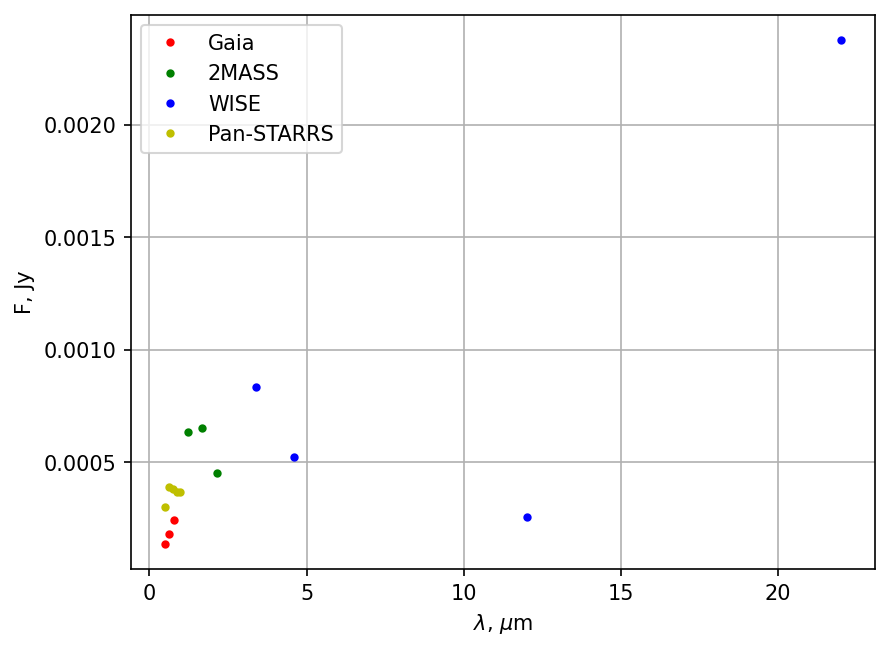

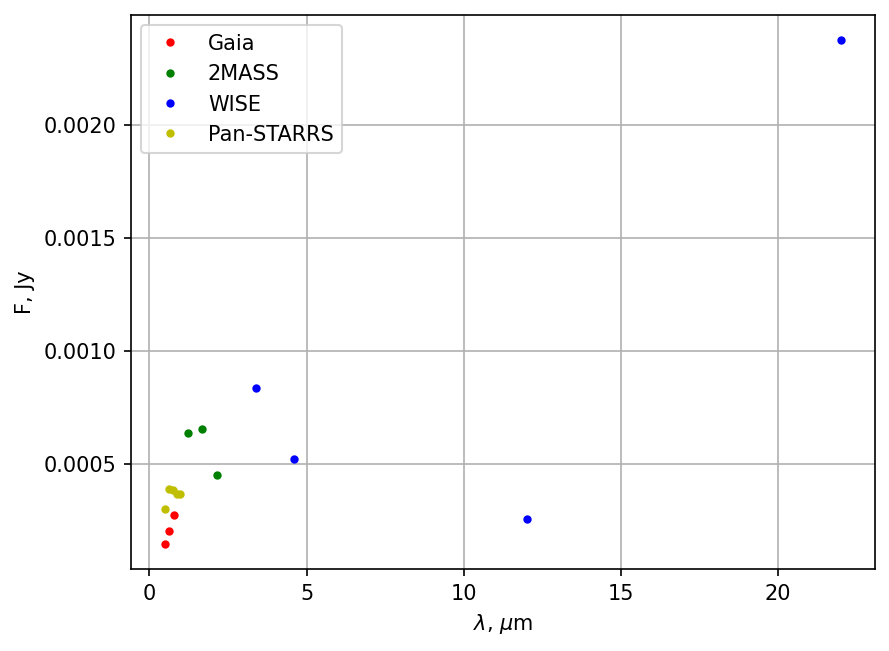

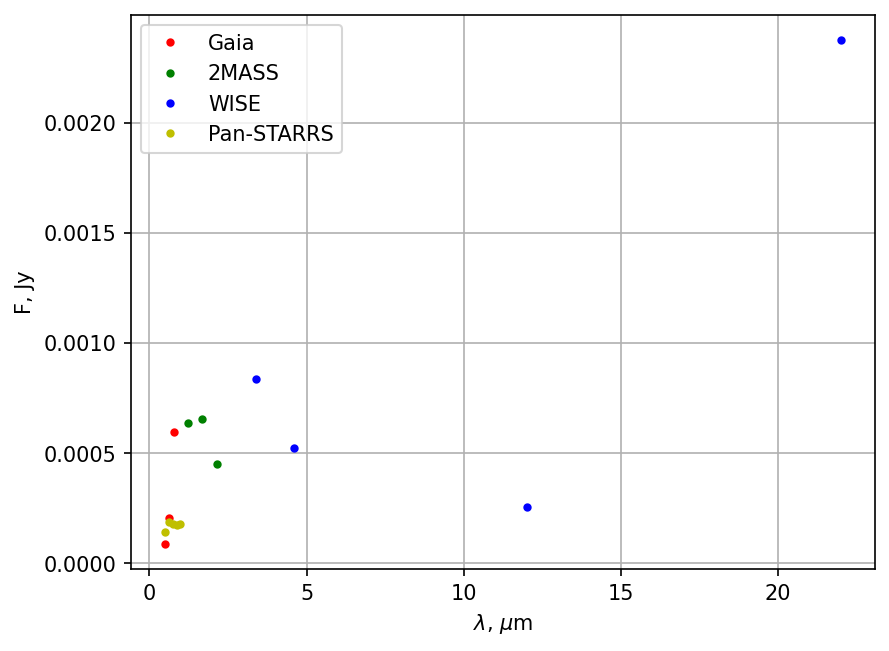

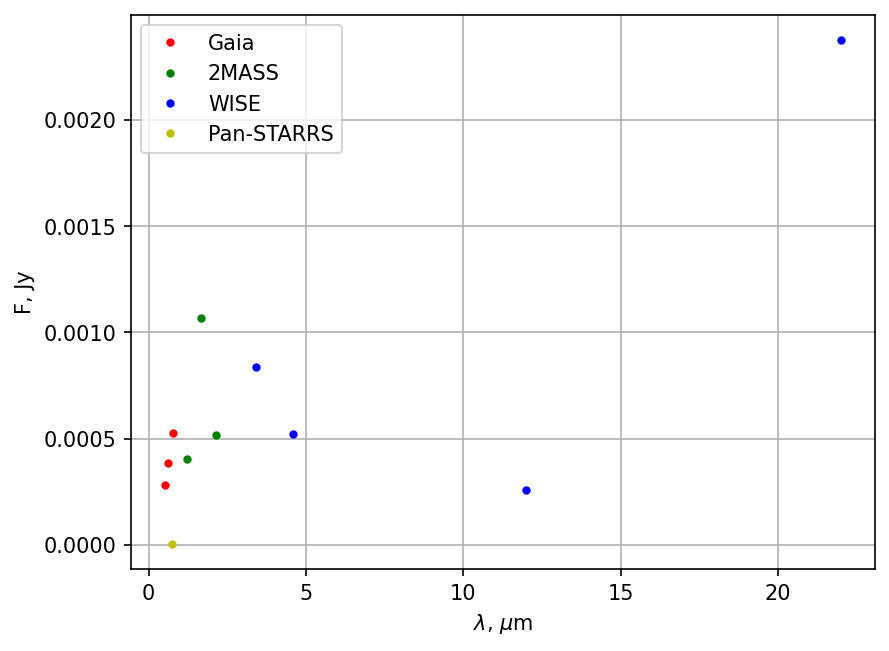

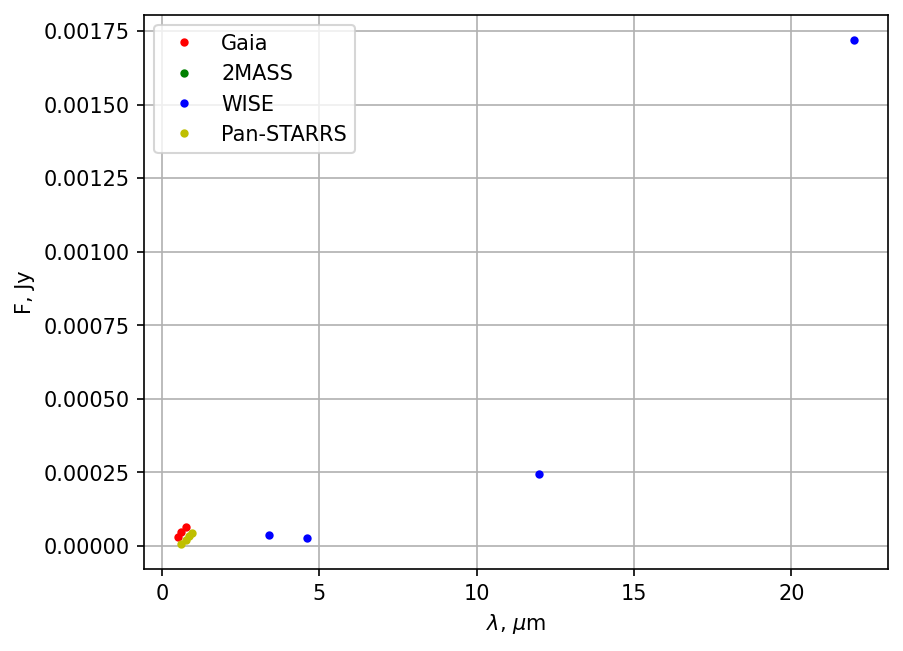

In [15]:
# qres = ascii.read("qres_flux.txt", delimiter="\t", format="commented_header",
#                   fill_values=[(ascii.masked, "nan")])
for _ in range(5):
    fig, ax = plt.subplots(dpi=150)
    # Gaia
    ax.plot(0.622, qres["Gmag"][_], ".r", label="Gaia")
    ax.plot(0.511, qres["BPmag"][_], ".r")
    ax.plot(0.777, qres["RPmag"][_], ".r")
    # 2MASS
    ax.plot(1.235, qres["Jmag"][_], ".g")
    ax.plot(1.662, qres["Hmag"][_], ".g")
    ax.plot(2.159, qres["Kmag"][_], ".g", label="2MASS")
    # WISE
    ax.plot(3.4, qres["W1mag"][_], ".b", label="WISE")
    ax.plot(4.6, qres["W2mag"][_], ".b")
    ax.plot(12, qres["W3mag"][_], ".b")
    ax.plot(22, qres["W4mag"][_], ".b")
    # Pan-STARRS
    ax.plot(0.4866, qres["gmag"][_], ".y")
    ax.plot(0.6215, qres["rmag"][_], ".y")
    ax.plot(0.7545, qres["imag"][_], ".y")
    ax.plot(0.8679, qres["zmag"][_], ".y")
    ax.plot(0.9633, qres["ymag"][_], ".y", label="Pan-STARRS")

    ax.set_xlabel(r"$\lambda$, $\mu$m")
    ax.set_ylabel(r"F, Jy")
    ax.grid()
    ax.legend()
    # plt.savefig(f"result_plot_{_}.png")
    plt.show()
    plt.close(fig=fig)